In [14]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

Function we are trying to approximate:

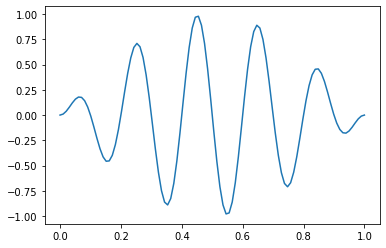

In [76]:
f_real = lambda t: np.sin(10*t*np.pi) * np.sin(t*np.pi)

X = np.linspace(0, 1, 100)
plt.plot(X, f_real(X))
plt.show()

We'll set $z\in\mathbb{R}^2$, so $f_\theta:\mathbb{R}^{3}\rightarrow\mathbb{R}^2$, as $x\in\mathbb{R}$.

In [79]:
class SimpleF(nn.Module):
    def __init__(self):
        super().__init__()

        self.A = nn.Linear(2,2)
        self.B = nn.Linear(1,2)
        
        # decreasing initial weights to increase stability
        self.A.weight = nn.Parameter(0.1 * self.A.weight)
        self.B.weight = nn.Parameter(0.1 * self.B.weight)
    
    def forward(self, z, x):
        return F.relu(self.A(z) + self.B(x))

f = SimpleF().float()

So, omitting the biases, our function is simply $f_\theta(z,x) = \text{ReLU}(Az + Bx)$.

Now, we need $h:\mathbb{R}^2\rightarrow\mathbb{R}$:

In [83]:
h = nn.Linear(2,1)

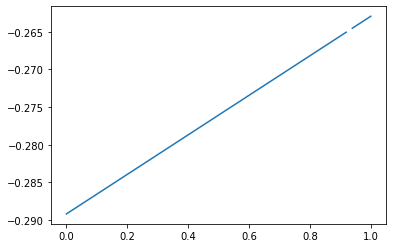

In [84]:
X_torch = torch.from_numpy(X).unsqueeze(-1).float()
Z_initial = torch.empty(X_torch.shape[0],2).float()

y = h(f(Z_initial, X_torch)).squeeze().detach().numpy()
plt.plot(X, y)
plt.show()

In [66]:
y

array([-1.1132168e+00, -4.4922305e+04, -1.1015730e+00, -1.0957510e+00,
       -1.0899292e+00, -1.0841073e+00, -4.5505227e+04, -1.0724635e+00,
       -1.0666417e+00, -1.0608199e+00, -1.0549979e+00, -1.0491760e+00,
       -1.0433542e+00, -1.0375323e+00, -1.0317104e+00, -1.0258886e+00,
       -1.0200666e+00, -1.0142448e+00, -1.0084229e+00, -1.0026010e+00,
       -9.9677920e-01, -9.9095726e-01, -9.8513544e-01, -9.7931349e-01,
       -9.7349167e-01, -9.6766973e-01, -9.6184790e-01, -9.5602596e-01,
       -9.5020413e-01, -9.4438219e-01, -9.3856037e-01, -9.3273848e-01,
       -9.2691660e-01, -9.2109472e-01, -9.1527283e-01, -9.0945101e-01,
       -9.0362906e-01, -8.9780724e-01, -8.9198536e-01, -8.8616347e-01,
       -8.8034159e-01, -8.7451971e-01, -1.2666647e+02, -8.6287594e-01,
       -8.5705411e-01, -8.5123217e-01, -8.4541035e-01, -8.3958840e-01,
       -8.3376658e-01, -8.2794464e-01, -8.2212281e-01, -8.1630093e-01,
       -8.1047904e-01, -8.0465716e-01, -7.9883528e-01, -7.9301339e-01,
      